# Midterm Exam
## Each task of the exam is performed on the original images, unless the reverse is said
## At the end of the exam, you need to commit Jupiter's notebook into GitHab in the machine vision repository in a separate folder called Midterm. Each task must be commited in separate corresponding file, e.g. Task1.ipynb.

### Task 1
Apply each filter to image, specify which properties corresponds to filters

(1) corresponds to a low-pass filter in the frequency domain; (2) less than the other specified noise-canceling filters, blurs edges; (3) increases the sharpness of the image (4) works slower than the other specified noise-canceling filters; (5) is not a noise canceling filter; (6) poorly removes noise such as "salt and pepper"; (7) will destroy all lines of one pixel thickness in the image


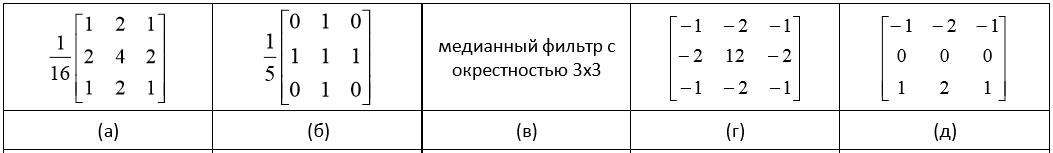

255
0


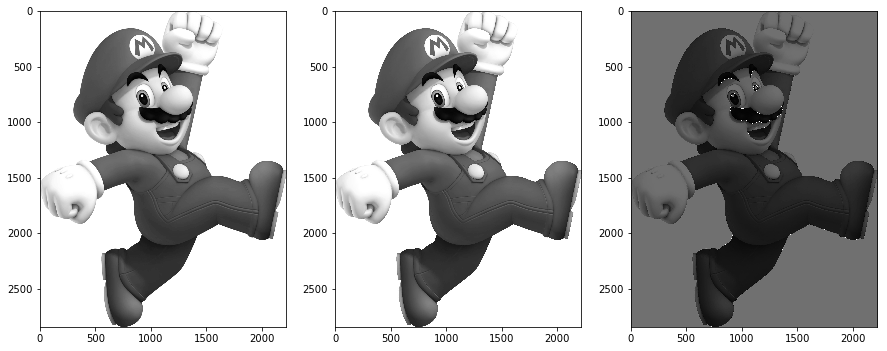

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import ndimage
import cv2
from scipy import misc

from PIL import Image
import numpy as np
%matplotlib inline

image = cv2.imread('./mario.png')
imlen = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


k = np.array([[1/16,1/16,1/16],
              [1/16,1/16,1/16],
              [1/16,1/16,1/16]
                 ])
flt = ndimage.convolve(imlen, k, mode='nearest', cval=0.0)
fmin = flt.min()
fmax = flt.max()
#flt = (flt-fmin)/(fmax-fmin)

fig = plt.figure(figsize=(15,10))


plt.subplot(131)
plt.imshow(flt,cmap='gray')
plt.subplot(132)
plt.imshow(imlen,cmap='gray')
maxValue = (imlen-flt).max()
print(maxValue)
minValue = (imlen-flt).min()
print(minValue)
plt.subplot(133)
plt.imshow(imlen-flt,cmap='gray')
plt.show()


255
0


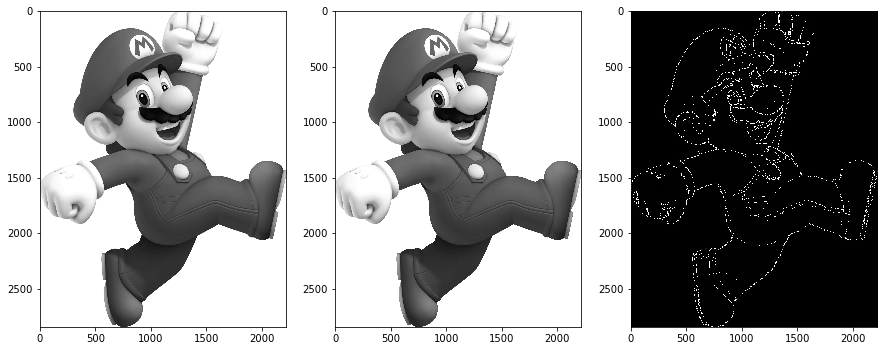

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import ndimage
import cv2
from scipy import misc

from PIL import Image
import numpy as np
%matplotlib inline

image = cv2.imread('./mario.png')
imlen = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


k = np.array([[0,1/5,0],
              [1/5,1/5,1/5],
              [0,1/5,0]
                 ])
flt = ndimage.convolve(imlen, k, mode='nearest', cval=0.0)
fmin = flt.min()
fmax = flt.max()
#flt = (flt-fmin)/(fmax-fmin)

fig = plt.figure(figsize=(15,10))


plt.subplot(131)
plt.imshow(flt,cmap='gray')
plt.subplot(132)
plt.imshow(imlen,cmap='gray')
maxValue = (imlen-flt).max()
print(maxValue)
minValue = (imlen-flt).min()
print(minValue)
plt.subplot(133)
plt.imshow(imlen-flt,cmap='gray')
plt.show()


255
0


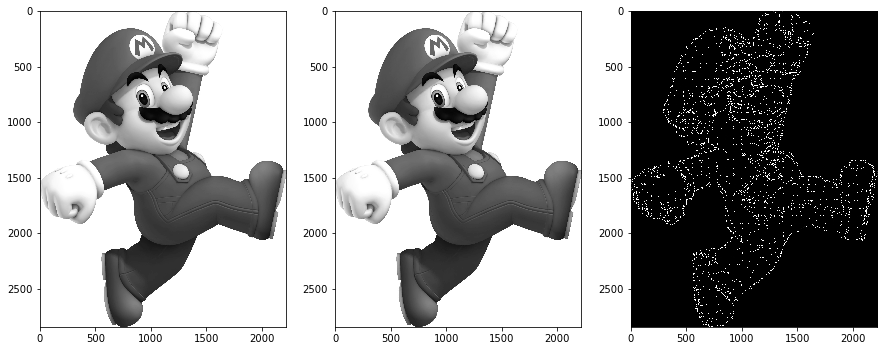

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as img


from scipy import ndimage
import cv2
from scipy import misc

from PIL import Image
import numpy as np
%matplotlib inline

image = cv2.imread('./mario.png')
imlen = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


flt = ndimage.median_filter(imlen, 3)
fmin = flt.min()
fmax = flt.max()
#flt = (flt-fmin)/(fmax-fmin)

fig = plt.figure(figsize=(15,10))


plt.subplot(131)
plt.imshow(flt,cmap='gray')
plt.subplot(132)
plt.imshow(imlen,cmap='gray')
maxValue = (imlen-flt).max()
print(maxValue)
minValue = (imlen-flt).min()
print(minValue)
plt.subplot(133)
plt.imshow(imlen-flt,cmap='gray')
plt.show()


255.0
-0.992156862745


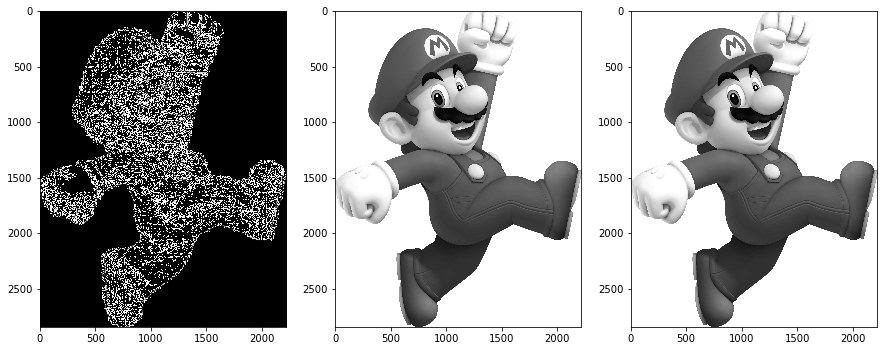

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import ndimage
import cv2
from scipy import misc

from PIL import Image
import numpy as np
%matplotlib inline

image = cv2.imread('./mario.png')
imlen = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


k = np.array([[-1,-2,-1],
              [-2,12,-2],
              [-1,-2,-1]
                 ])
flt = ndimage.convolve(imlen, k, mode='nearest', cval=0.0)
fmin = flt.min()
fmax = flt.max()
flt = (flt-fmin)/(fmax-fmin)

fig = plt.figure(figsize=(15,10))


plt.subplot(131)
plt.imshow(flt,cmap='gray')
plt.subplot(132)
plt.imshow(imlen,cmap='gray')
maxValue = (imlen-flt).max()
print(maxValue)
minValue = (imlen-flt).min()
print(minValue)
plt.subplot(133)
plt.imshow(imlen-flt,cmap='gray')
plt.show()


255.0
-1.0


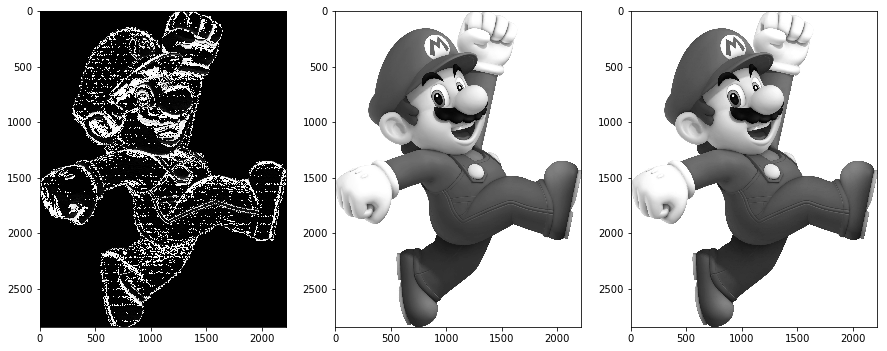

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import ndimage
import cv2
from scipy import misc

from PIL import Image
import numpy as np
%matplotlib inline

image = cv2.imread('./mario.png')
imlen = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


k = np.array([[-1,-2,-1],
              [0,0,0],
              [1,2,1]
                 ])
flt = ndimage.convolve(imlen, k, mode='nearest', cval=0.0)
fmin = flt.min()
fmax = flt.max()
flt = (flt-fmin)/(fmax-fmin)

fig = plt.figure(figsize=(15,10))


plt.subplot(131)
plt.imshow(flt,cmap='gray')
plt.subplot(132)
plt.imshow(imlen,cmap='gray')
maxValue = (imlen-flt).max()
print(maxValue)
minValue = (imlen-flt).min()
print(minValue)
plt.subplot(133)
plt.imshow(imlen-flt,cmap='gray')
plt.show()


### Task 2
Construct a histogram of the brightness of the image. Apply the operation "linear stretching of brightness" and "the gray world" to the image. Operation "the gray world" needs to be realized independently. The mean can be called three times.

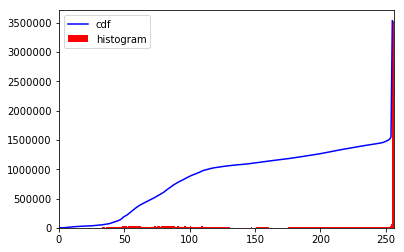

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('./mario.png')
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

### Task 3
Shake the image with a noise like "salt and pepper". Suppress noise with a median filter. Map the difference between the original and noisy images, and between the adjusted and the original.

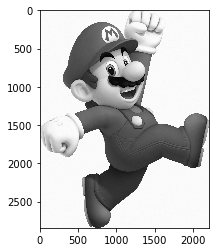

In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import ndimage
import cv2
from scipy import misc

from PIL import Image
import numpy as np
%matplotlib inline

image = cv2.imread('./mario.png')
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

row,col= img.shape
gauss = np.random.normal(0,1,(row,col))
gauss = gauss.reshape(row,col)
noisy = img + gauss

plt.imshow(noisy, cmap = "gray")
plt.show()

### Task 4

Apply the Canny and Sobel edge selection filters to the image. Try different options. Output the result of the selection of edges on the original color image in red.